<a href="https://colab.research.google.com/github/nikitagarde/THE-SPARK-FOUNDATION/blob/main/Welcome_To_Colaboratory_Nikita_Garde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Authors** **:** **Nikita** **Sunil** **Garde**

# **The** **Spark** **Foundation**

# **Task** **1** **-** **Prediction** **Using** **Supervised** **ML**

**problem** **Statement** **:** **predict** **the** **percentage** **of** **an** **student** **based** **on** **the** **no.** **of** **study** **hours**

**Dataset**  **:** http://bit.ly/w-data

# **Importing** **Libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Loading** **The** **Dataset**

In [ ]:
data_df = pd.read_csv('http://bit.ly/w-data')
data_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data_df.shape

(25, 2)

AS WE CAN SEE THAT THERE ARE **25** **ROWS** AND **2** **COLOUMNS** IN THE DATASET


# **Data** **Exploration**

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

 **THERE IS NO NULL VALUE**

# **Data** **Visualization**

LET'S **PLOT** OUR DATA POINTS ON **2-D** **GRAPHS** **TO** **VISUALIZE** OUR DATASET AND SEE IF WE CAN MANUALLY FIND ANY **RELATIONSHIP** BETWEEN THE DATA

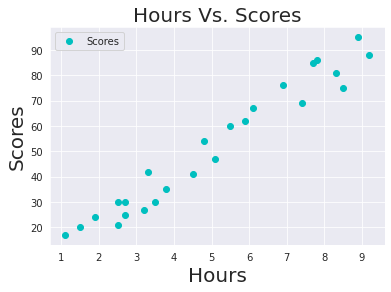

In [ ]:
sns.set_style('darkgrid')
plt.plot(data_df['Hours'],data_df['Scores'],'oc')
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('Hours Vs. Scores',fontsize = 20)
plt.legend(['Scores']);

FEOM THE GRAPH,WE CAN CLEARLY SEE THAT THERE IS **POSITIVE** **LINEAR** **RELATION** BETWEEN THE **NUMBER** **OF** **HOURS** STUDIED AND **PERCENTAGE** **OF** **SCORE**

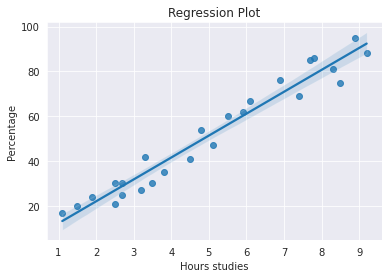

In [ ]:
sns.regplot(x = data_df['Hours'], y = data_df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours studies')
plt.ylabel('Percentage');

FROM THE **REGRATION** **PLOT** IT IS CONFIRMED THAT THE **PARAMETERS** ARE **POSITIVELY** CORRELATED

#**Boxplot** **Of** **Dataset**  

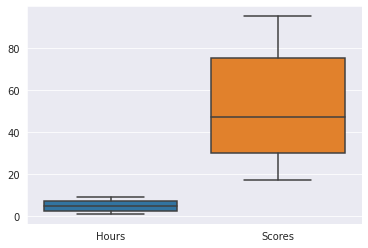

In [ ]:
sns.boxplot(data=data_df[['Hours','Scores']]);

FROM THE ABOVE PLOT, WE CAN CLAERLY SEE THAT THERE IS **NO** **OUTLIERS** IN THE DATA

# **Splitting** **the** **Dataset** 

In [ ]:
X = data_df.iloc[:,:-1].values
y = data_df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state = 0)

In [ ]:
X_train.shape, X_test.shape 

((18, 1), (7, 1))

HERE WE CAN SEE THAT **80%** OF THE DATA IS USED FOR **TRAINING** AND THE REST **20%** IS USED FOR **TESTING**

# **Training** **the** **Model**

WE WILL USE THE **80%** OF THE TRAINING DATA TO **TRAIN THE MODEL**



In [ ]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train,Y_train)

LinearRegression()

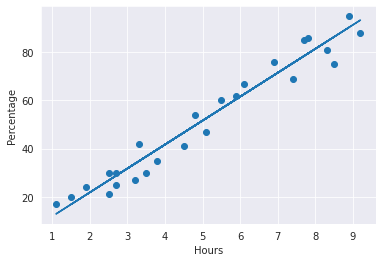

In [ ]:
line = lg.coef_ * X + lg.intercept_
plt.scatter(data_df['Hours'],data_df['Scores'])
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Percentage');

#**Making Predicate**

NOW, WE WILL **TEST** OUR **ALGORITHM** WITH THE REST  **20%** OF THE DATA THAT WE HAVE **SPLITTED** AND MAKE **PREDICTIONS**

In [ ]:
y_pred = lg.predict(X_test).round()
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test] ,'Predicted Scores':[y for y in y_pred]})
prediction

,Hours,Predicted Scores
0,1.5,17.0
1,3.2,34.0
2,7.4,76.0
3,2.5,27.0
4,5.9,61.0
5,3.8,40.0
6,1.9,21.0


#**Compairing** **Actual** **Score** **Vs.** **Predicatde** **Score**

In [ ]:
pred = pd.DataFrame({'Actual Score': Y_test, 'Predicted Score%':y_pred})
pred

,Actual Score,Predicted Score%
0,20,17.0
1,27,34.0
2,69,76.0
3,30,27.0
4,62,61.0
5,35,40.0
6,24,21.0


**WHAT WILL BE PREDICATED SCORE IF A STUDENT STUDIES FOR 9.25 HRS/DAY?**

In [ ]:
hours = np.array([[9.25]])
pred = lg.predict(hours)
print('No. of hours = {}'.format(hours[0][0]))
print('Predicted Score = %.2f'%pred)

No. of hours = 9.25
Predicted Score = 93.89


ACCORDING TO THE **REGRESSION** MODEL IF A STUDENT **STUDIES** **9.25** HOURS A DAY, HE/SHE ID LIKELY TO **SCORE** **93.89** MARKS

#**Evaluating** **the** **Model**

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error = %.2f'%mean_absolute_error(Y_test,y_pred))

Mean absolute error = 4.14


SMALL VALUE OF **MEAN** **ABSOULTE** **ERROR** STATES THAT THE CHANCES OF ERRORS OR WRONG FORECASTING THEOUGH THE MODLE ARE **VERY** **LESS**


# **Thank You**